<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb) | [Contents](Index.ipynb) | [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


#  In Depth: Principal Component Analysis

非監督式演算法，PCA是一種降維的演算法，但也可以用作視覺化、雜訊過濾、特徵擷取與工程的工具。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 主成分分析介紹

主成分分析是一個快速且具有彈性，用來對資料進行降維的非監督式方法。

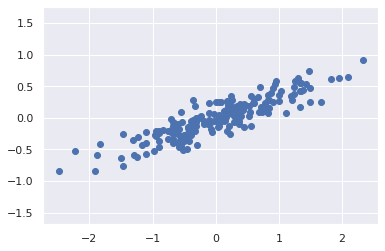

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

透過圖可看出，x和y變數有存在一個接近線性的關係，但跟線性迴歸有點不一樣:相較於從x的值去預測y的值，此非監督式學習問題嘗試去學習關於在x和y值之間的關係。

在PCA中，先找出資料中主要軸(principal axes)的一個串列來量化這些關係，然後使用這些軸來描述這個資料集。

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components：要保留組件的數量
pca.fit(X)

PCA(n_components=2)

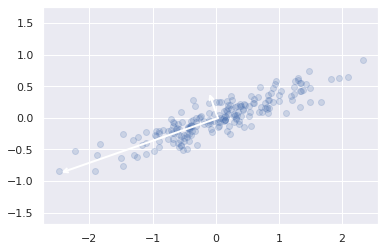

In [7]:
# 預測資料的向量方向及平方長度
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# 繪出資料
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_): # 已解釋變異量:定義向量的平方長度, 成份:定義向量的方向
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

這些向量表示資料的主要軸，圖中的長度表示在描述這個資料的分布時，這個軸的重要程度。更精確來說，這是一個用來衡量當資料被投射到此軸時的變異量。每一個投射到主軸上的資料點就是此資料的主要成份。

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-PCA-rotation.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Principal-Components-Rotation)

從資料軸到主要軸的轉換是一個混合線性二維轉換(affine transformation)，基本上是由平移、旋轉、等比例縮放所組合成的轉換。

### 使用PCA進行降維

使用PCA降維就是把1個或數個最小的主要成份移除，結果就會是可以保留最大資料變異量的較低維度之投影。

In [8]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


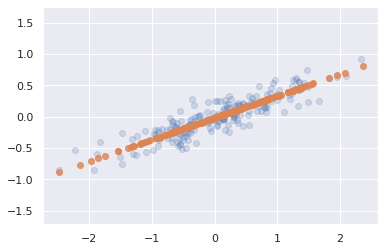

In [9]:
# 轉換前後比較(淺:原始，深:轉換後)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

可看出最不重要的主軸資料被移除，留下來的只有那些擁有最高變異量的資料成份。變異量的小數被切除之後大約可以做為一個衡量在此降維運算中，有多少資訊被丟棄的情況。

### PCA在視覺化上的應用: 手寫數字

降維的用處並不會是只有在二維才那麼明顯，也可讓我們在關注高維度資料時更加清晰。

In [10]:
# 載入資料
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
pca = PCA(2)  # 從8x8 64個維度降維到2個維度
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


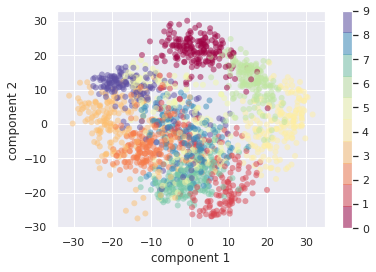

In [13]:
# 把每一個點的前2個主要成份化出來，並從這些成份中學習這筆資料
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

完整的資料是一個64個維度由點所組成的雲，而這些點是每一個資料點沿著最大變異量方向之投影。本質上，我們發現在64個維度中最佳的延展和旋轉，可以看出這些數字元在二維平面上的排列，而這些是使用非監督式方法所完成，也就是在沒有任何標籤的情況下所進行的。

### 成份的意義?

可以進一步找出被減少的維度所代表的意義。此意義可以從基向量的組合方面來了解。
例如:每一個在訓練集中的影像被以64個像素值的集合所定義，可以稱為向量$x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

可以從像素基(pixel basis)的方向來思考。也就是，用來建構影像，把每一個向量元素乘上它的像素，再把這些結果加在一起，就建立這張影像:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

藉由丟棄像素來進行基礎降維方法:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pixel-components.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Digits-Pixel-Components)

降維還有其他方法，可用其他的函數`每一個包含一些來自於每一個像素預先定義的分布，如下所示:

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA可以把它想成是選用最佳化函數的程序，因此，只要把前面幾個少數的部分加在一起，就足以適當的重構此資料集的大量元素。

藉由丟棄最不重要的PCA方式完成更複雜的降維

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pca-components.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Digits-PCA-Components)

### 選擇成份的數量

PCA是有能力去評估要用來描述資料需要多少的成份。可藉由檢視把累積的*已解釋變異量比例(explained variance ratio)*當作是一個成份數量函數來決定:

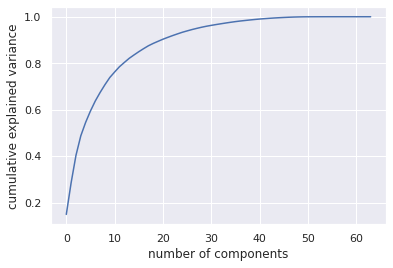

In [14]:
# 累積的已解釋變異量比例可用來評估PCA保留資料內容的好壞程度
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## PCA用於雜訊過濾

概念: 任一個成份具有變異量遠大於雜訊的影響，所以如果只使用主要成份的最大子集合來重建資料，則你應該會優先保留訊號而丟棄掉那些雜訊。

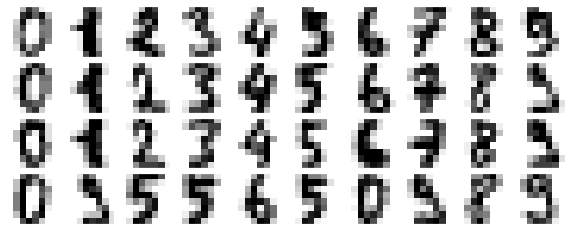

In [15]:
# 畫幾個沒有雜訊的輸入資料
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

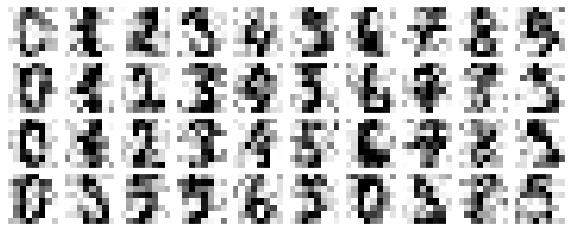

In [17]:
# 加入一些隨機的雜訊以建立雜訊資料集，再重畫一次
np.random.seed(42)
noisy = np.random.normal(digits.data, 4) # standard deviation:4
plot_digits(noisy)

In [18]:
# 在這個混亂的資料中訓練PCA，並保留50%的變異量
# 得知需要12個主要成份
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

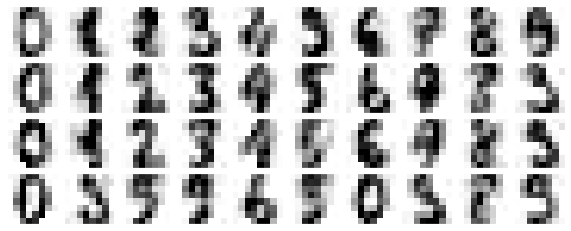

In [19]:
# 可以計算這些成份，然後使用它們去反轉此轉換以重建此過濾過的數字元
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

此種訊號保留但雜訊去除的特性，使得PCA成為一個非常有用的特徵選擇程序。例如，與其在一個非常高維度的資料中訓練一個分類器，可能會想在較低維度的資料中訓練這個分類器，而且會自動過濾掉在輸入時的隨機雜訊。

## 範例: 特徵臉

In [20]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


檢視在主要軸上延展這個資料集的內容。因為這是一個大型的資料集，將使用``RandomizedPCA``—它包含了一個隨機的方法去近似前面N個主要成份，可以比標準的``PCA``評估器速度更快，如此在高維度的資料中就會非常有用(在此，維度大約是3000個左右)。

In [22]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150) # 先關注前面150個成份
pca.fit(faces.data)

PCA(n_components=150)

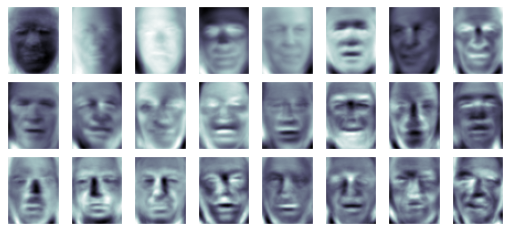

In [23]:
# 把前面幾個主要成份結合在一起再視覺化，即稱為特徵向量(eigenectors)
# 此型式的影像通常被稱為特徵臉(eigenfaces)
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

可初步看出這些臉的變化:前幾個(從左上)特徵臉的臉上看起來似乎是有某一角度的光線打在上面，而後面的主要向量似乎是被挑走了某些特徵，像是眼睛、鼻子和嘴唇等。接著檢視這些元件的累積變異量，看看此投影中有多少資訊被保留下來。

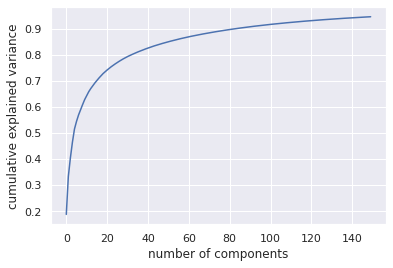

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

可看出150個成份已經有超過90%的變異量

In [25]:
# 計算成份和被投影的臉
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

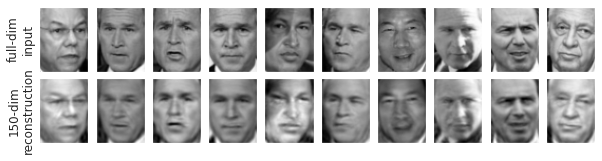

In [26]:
# 繪出結果
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

上圖的上方列顯示了輸入的資料，下方列則是從大約3000個原始特徵中的150個所重建的影像。儘管減少了將近20倍的維度，所投影出來的影像仍然保有足夠的資訊讓我們可以從肉眼去辨識出它們的不同。它的意義是:分類演算法只需要去訓練150個維度資料而不是3000個維度，在我們所選用的演算法中，可以讓它們在分類上更有效率。

## PCA總結

PCA降維使用在對於高維度資料的視覺化、雜訊過濾，以及高維度資料特徵選擇的應用上。因為PCA的可解釋特性以及多面性，它已經在許多領域以及學門上非常有效且廣泛的運用。

拿到任一高維度的資料集，通常會先利用PCA去視覺化各資料點間的關係(前面在數字元時做的事)，去了解資料主要的變異量(在特徵臉中做的)，以及去了解維度的本質(藉由畫出已解釋變異量比率來做到)。

PCA並非對於每一個高維度資料都適用，但它可提供簡易直觀且有效的途徑去取得對於高維度資料的深入觀察。

PCA主要的缺點是它很容易被資料中的異常值所高度影響。後來研發出許多PCA的變形，這些變形中有許多是重複的丟棄那些不太能夠被初始成份所描述的資料點。包含``RandomizedPCA``和``SparsePCA``。